In [1]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2

import pennylane as qml
import pennylane.numpy as np

from src.tests import calculate_heisenberg_runtime_vs_qubits, calculate_heisenberg_runtime_fidelity_vs_qubits, calculate_sv_samples
from src.plots import plot_runtimes_vs_qubits, plot_error_vs_qubits
from src.helpers import calculate_error, calculate_avg_dms, calculate_mean, calculate_std_vs_ntraj, calculate_mean_vs_ntraj
import matplotlib.pyplot as plt
import pickle

In [7]:
num_wires_list = range(2, 6)
couplings = {"J_xx": 1, "J_yy":2, "J_zz": 1, "h": 0.3}
T = 1
depth = 10
p = 0.0033
samples = 200

# <center> GPU

In [8]:
# calculation for density matrix:
num_wires_list_dm = range(2, 11)

times_dm, ideal_dm = calculate_heisenberg_runtime_fidelity_vs_qubits("default.mixed", num_wires_list_dm, couplings, T=T, depth=depth, p=p)

In [12]:
num_wires_list

range(2, 6)

In [13]:
# NOTE: for CPU
num_wires_list_cpu = range(2, 21)

times_q_cpu = []
states_q_cpu= []
for wires  in num_wires_list:
    time, states = calculate_sv_samples(couplings, backend='lightning.qubit', T=1, depth=100, wires=wires, p=0.0033, samples=200)
    times_q_cpu.append(time)
    states_q_cpu.append(states)

In [11]:

for i in range(4):
    print(times_q_cpu[i][-1])

In [ ]:
times_q_GPU = []
states_q_GPU= []
for wires  in num_wires_list_gpu:
    time, states = calculate_sv_samples(couplings, backend='lightning.gpu', T=T, depth=depth, wires=wires, p=p, samples=samples)
    times_q_GPU.append(time)
    states_q_GPU.append(states)

In [12]:
times_q_cpu = np.transpose(times_q_cpu)
times_q_GPU = np.transpose(times_q_GPU)

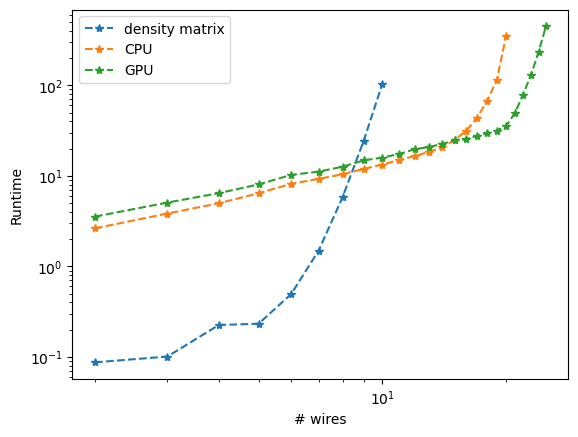

In [13]:
plt.loglog(num_wires_list_dm, times_dm, marker='*', linestyle='--', label=f'density matrix')
plt.loglog(num_wires_list_cpu, times_q_cpu[-1], marker='*', linestyle='--', label=f'CPU')
plt.loglog(num_wires_list_gpu, times_q_GPU[-1], marker='*', linestyle='--', label=f'GPU')
plt.xlabel("# wires")
plt.ylabel("Runtime")
plt.legend()
plt.show()

In [14]:
# saving all the data
files_dic = {'times_q_GPU':times_q_GPU, 'states_q_GPU': states_q_GPU, 'times_q_cpu':times_q_cpu, 'states_q_cpu':states_q_cpu, 'times_dm':times_dm, 'ideal_dm':ideal_dm}
for name, value in files_dic.items():
    with open(name,mode='wb') as f:
        pickle.dump(value, f)


In [ ]:
for i, wires in 